In [ ]:
#Data Preprocessing
import pandas as pd

# Load dataset
df = pd.read_csv('chitrika nm project data.csv')

# Module 1: Clean column names and string values
df.columns = [col.strip() for col in df.columns]
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Module 2: Remove redundant header rows found in raw data
df = df[df['loan_status'] != 'loan_status'].reset_index(drop=True)

# Module 3: Convert columns to numeric
numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()
print("Preprocessing complete. Total records:", len(df))

Preprocessing complete. Total records: 347


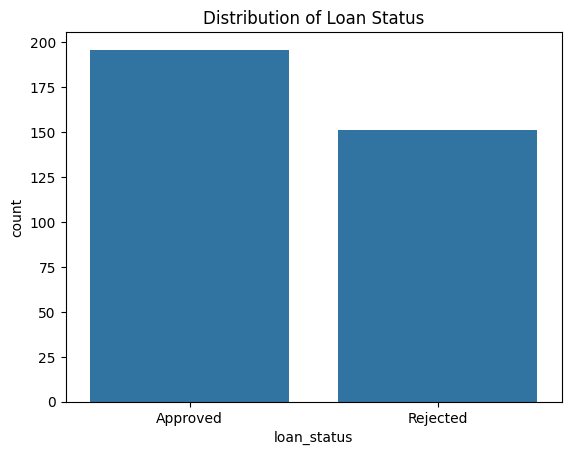

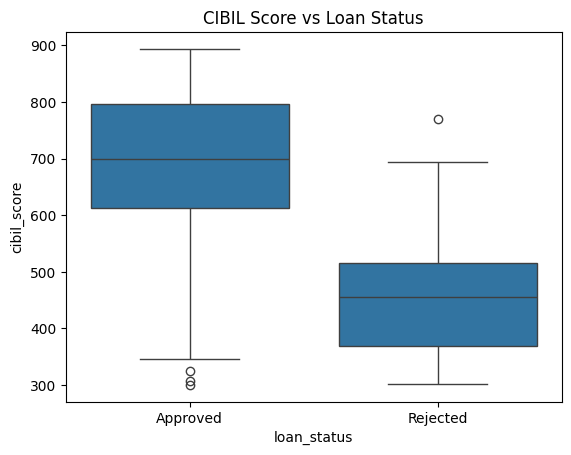

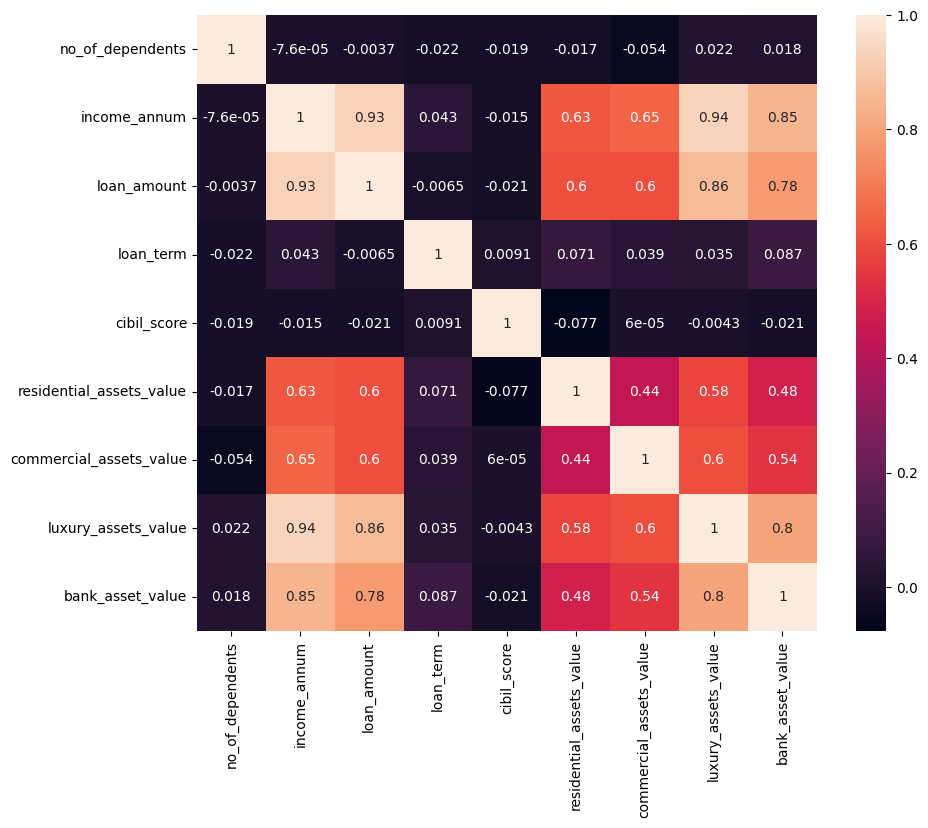

In [ ]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Module 4: Target Class Distribution
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

# Module 5: CIBIL Score Impact
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.show()

# Module 6: Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding Categorical Data
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

# Scaling Numerical Data
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Engineering Complete.")
print("Scaled Sample (First Row):\n", X_scaled[0])

Feature Engineering Complete.
Scaled Sample (First Row):
 [-0.38463633 -1.10008685 -0.9743912   1.57083327  1.59727229  0.1786105
  1.12081001 -0.75975632  2.87052834  0.76698912  0.97265396]


In [ ]:
#Model Building
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# 1. Make Predictions
y_pred = rf_model.predict(X_test)

# 2. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 3. Generate Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print(f"Overall Accuracy: {accuracy:.2%}")
print("\nClassification Report Table:")
print(df_report)

print("Model Training Successful.")

Overall Accuracy: 85.71%

Classification Report Table:
              precision    recall  f1-score    support
0              0.833333  0.882353  0.857143  34.000000
1              0.882353  0.833333  0.857143  36.000000
accuracy       0.857143  0.857143  0.857143   0.857143
macro avg      0.857843  0.857843  0.857143  70.000000
weighted avg   0.858543  0.857143  0.857143  70.000000
Model Training Successful.


Accuracy Score: 0.8571428571428571

Detailed Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.88      0.83      0.86        36

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



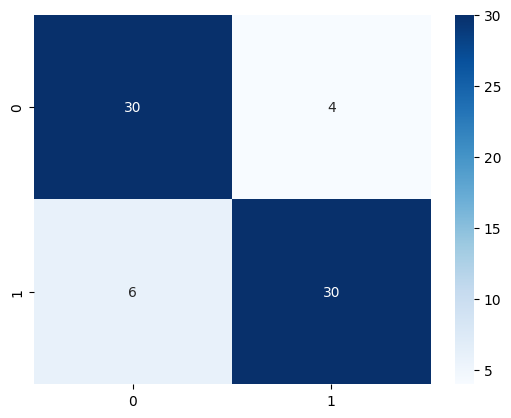

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
#deployment
import pickle

# Save the trained Random Forest model
with open('loan_model.pkl', 'wb') as f1:
    pickle.dump(rf_model, f1)

# Save the scaler (Crucial for normalizing user input)
with open('scaler.pkl', 'wb') as f2:
    pickle.dump(scaler, f2)

print("Files saved successfully. You can now run the Gradio code.")

Files saved successfully. You can now run the Gradio code.


In [ ]:
import gradio as gr
import pickle
import numpy as np

# 1. Load the saved model and scaler
modelñ pickle.load(open('loan_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# 2. Define the Prediction Function
def predict_loan(dep, edu, emp, inc, loan, term, cibil, res, com, lux, bank):
    # Mapping categorical inputs to numbers
    edu_val = 0 if edu == "Graduate" else 1
    emp_val = 1 if emp == "Yes" else 0

    # Create input array
    input_data = np.array([[dep, edu_val, emp_val, inc, loan, term, cibil, res, com, lux, bank]])

    # Scale the input data
    scaled_data = scaler.transform(input_data)

    # Predict
    prediction = model.predict(scaled_data)

    return "✅ Approved" if prediction[0] == 0 else "❌ Rejected"

# 3. Build the Interface
app = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="No. of Dependents"),
        gr.Dropdown(["Graduate", "Not Graduate"], label="Education"),
        gr.Radio(["Yes", "No"], label="Self Employed"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Term (Years)"),
        gr.Slider(300, 900, label="CIBIL Score"),
        gr.Number(label="Residential Assets"),
        gr.Number(label="Commercial Assets"),
        gr.Number(label="Luxury Assets"),
        gr.Number(label="Bank Assets")
    ],
    outputs=gr.Textbox(label="Loan Decision"),
    title="Chitrika NM Project: Loan Approval System",
    description="This interface uses a Random Forest Model to predict loan eligibility based on applicant data."
)



# 4. Launch
app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b419db13dcc91de5c3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,0
1,2,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,4,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1
